In [1]:
# libraries we need
import os.path

# from openearth/bmi-python @ github
import bmi.wrapper

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# load the model library
model = bmi.wrapper.BMIWrapper(os.path.expanduser('~/src/LISFLOOD/liblisflood.so'))

In [3]:
# load the settings
model.initialize(os.path.expanduser("~/models/lisflood/buscot.par"))

In [4]:
# get time variables
model.get_start_time(), model.get_current_time(), model.get_end_time(), model.get_time_step()

(0.0, 0.0, 100000.0, 1.0)

In [5]:
# do a timestep and check if we're going forward (with default timestep)
model.update()
model.get_current_time()


1.0

In [6]:
# check the ranks of the variables
model.get_var_rank('H'), model.get_var_rank('DEM')

(2, 2)

In [7]:
# check the shapes
model.get_var_shape('H'), model.get_var_shape('DEM')

((48, 76), (48, 76))

In [8]:
# get the variables
H = model.get_var('H')
DEM = model.get_var('DEM')
H, DEM

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[ 75.      ,  74.595665,  74.467987, ...,  69.161949,  68.998474,
          68.834999],
        [ 74.868477,  74.453445,  74.332367, ...,  69.212997,  69.299004,
          69.017998],
        [ 74.736954,  74.311226,  74.196747, ...,  69.589996,  69.482002,
          69.288002],
        ..., 
        [ 71.750603,  71.552002,  71.862   , ...,  74.480148,  74.522324,
          75.409637],
        [ 72.151649,  72.431999,  72.342003, ...,  75.      ,  75.      ,
          75.      ],
        [ 72.721222,  72.921997,  72.732002, ...,  75.      ,  74.999992,
          75.      ]]))

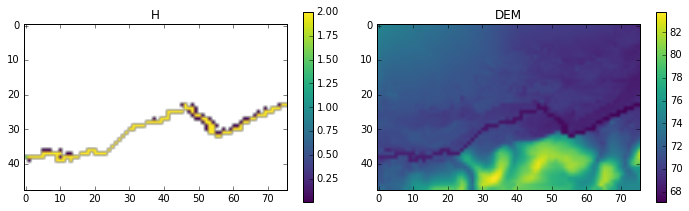

In [9]:
# plot the variables
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

im = axes[0].imshow(np.ma.masked_less(H, 0.01), cmap='viridis')
plt.colorbar(im, ax=axes[0])
axes[0].set_title('H')

im = axes[1].imshow(DEM, cmap='viridis')
plt.colorbar(im, ax=axes[1])
axes[1].set_title('DEM')
fig.tight_layout()

In [10]:
# lots of water, should flow down the hill and flood the area
model.get_var('H')[30:40,45:55] = 3
# 10 timesteps
for i in range(100):
    model.update()

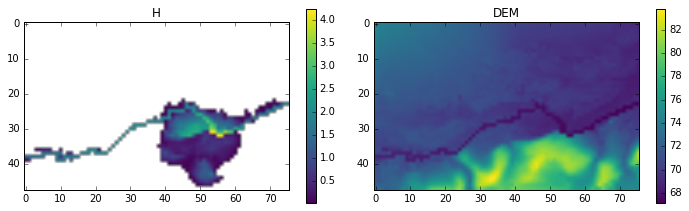

In [11]:
# plot the variables
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

im = axes[0].imshow(np.ma.masked_less(H, 0.01), cmap='viridis')
plt.colorbar(im, ax=axes[0])
axes[0].set_title('H')

im = axes[1].imshow(DEM, cmap='viridis')
plt.colorbar(im, ax=axes[1])
axes[1].set_title('DEM')
fig.tight_layout()

In [12]:
# polder connected to river (should flood)
model.get_var('DEM')[30:40,20:30] = 65
# 10 timesteps
for i in range(100):
    model.update()

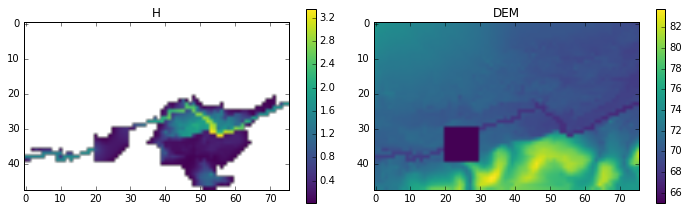

In [13]:
# plot the variables
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

im = axes[0].imshow(np.ma.masked_less(H, 0.01), cmap='viridis')
plt.colorbar(im, ax=axes[0])
axes[0].set_title('H')

im = axes[1].imshow(DEM, cmap='viridis')
plt.colorbar(im, ax=axes[1])
axes[1].set_title('DEM')
fig.tight_layout()